In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import math
import csv
import os
import codecs
import time
import seaborn as sns
import statistics 
import scipy.stats

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
fontsize_legend = 16 
linesize_legend = 4 
plt.rc('legend',fontsize=fontsize_legend)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

In [2]:
# Material properties for Ethylen Glycol
A = 2.0148;
B = 4.50E-3;
def cp(T):
    cp = (A + B * (T+273.15));
    return cp
def cp_K(T):
    cp_K = A + B * (T);
    cp_K =  cp_K *1000;##???
    return cp_K

C = 0.2134;
D = 6.071E-4;
def Lambda(T):
    Lambda = C + D * (T+273.15);
    return Lambda
def Lambda_K(T):
    Lambda_K = C + D * (T);
    return Lambda_K


E = 1.1001E-4;
F = 325.85;
G = -207.30;
def mu(T):
    mu = E * np.exp( F / ( (T+273.15) + G) );
    return mu
def mu_K(T):
    mu_K = E * np.exp( F / ( (T) + G) );
    return mu_K

H = 1268.28;
I = -0.66;
def rho(T):
    rho = H + I * (T+273.15);
    return rho
def rho_K(T):
    rho_K = H + I * (T);
    return rho_K
def nu(T):
    nu = mu(T)/rho(T);
    return nu
def nu_K(T):
    nu_K = mu_K(T)/rho_K(T);
    return nu
def Pr(T):
    Pr = ( mu(T) * cp(T) * 1000 ) / Lambda(T);
    return Pr
def Pr_K(T):
    Pr_K = ( mu_K(T) * cp_K(T)) / Lambda_K(T);
    return Pr_K

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


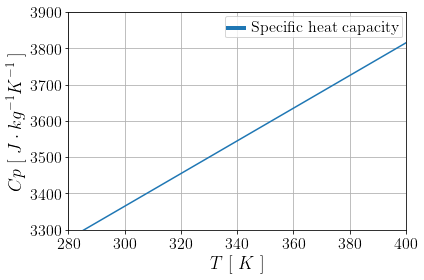

In [3]:
T = np.linspace(280,400,)

fig = plt.figure(1)
ax1=plt.subplot(111) 
plt.xlim(280,400)
plt.ylim(3300,3900)
plt.plot(T, cp_K(T), label="Specific heat capacity")

plt.grid(True)
plt.xlabel(r'$T\ [\ K\ ]$',fontsize=fontsize_legend+2)
plt.ylabel(r'$Cp\ [\ J \cdot kg^{-1} K^{-1}\ ]$',fontsize=fontsize_legend+2)

ax1.xaxis.set_ticks(np.arange(280,401,20))
ax1.yaxis.set_ticks(np.arange(3300,3902,100) )
leg = ax1.legend(loc='upper right',prop={'size': 8})
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=linesize_legend)
plt.setp(leg_texts, fontsize=fontsize_legend)

OutPutFig = '../doc/master_thesis/fig/cp.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)

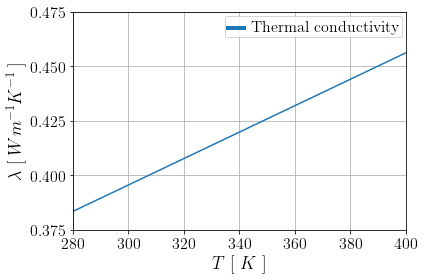

In [4]:
fig = plt.figure(2)
ax1=plt.subplot(111) 
plt.xlim(280,400)
#plt.ylim(3300,3900)
plt.plot(T, Lambda_K(T), label="Thermal conductivity")

plt.grid(True)
plt.xlabel(r'$T\ [\ K\ ]$',fontsize=fontsize_legend+2)
plt.ylabel(r'$\lambda \ [\ W m^{-1} K^{-1}\ ]$',fontsize=fontsize_legend+2)

ax1.xaxis.set_ticks(np.arange(280,401,20))
ax1.yaxis.set_ticks(np.arange(0.375,0.480,0.025) )
leg = ax1.legend(loc='upper right',prop={'size': 8})
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=linesize_legend)
plt.setp(leg_texts, fontsize=fontsize_legend)

OutPutFig = '../doc/master_thesis/fig/lambda.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)

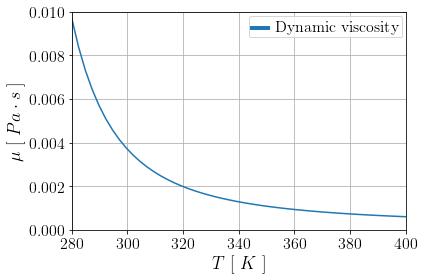

In [5]:
#T = np.linspace(280,400,)

fig = plt.figure(3)
ax1=plt.subplot(111) 
plt.xlim(280,400)
plt.ylim(0,0.010)
plt.plot(T, mu_K(T), label="Dynamic viscosity")

plt.grid(True)
plt.xlabel(r'$T\ [\ K\ ]$',fontsize=fontsize_legend+2)
plt.ylabel(r'$\mu \ [\ Pa \cdot s\ ]$',fontsize=fontsize_legend+2)

ax1.xaxis.set_ticks(np.arange(280,401,20))
#ax1.yaxis.set_ticks(np.arange(0.375,0.480,0.025) )
leg = ax1.legend(loc='upper right',prop={'size': 8})
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=linesize_legend)
plt.setp(leg_texts, fontsize=fontsize_legend)

OutPutFig = '../doc/master_thesis/fig/mu.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)

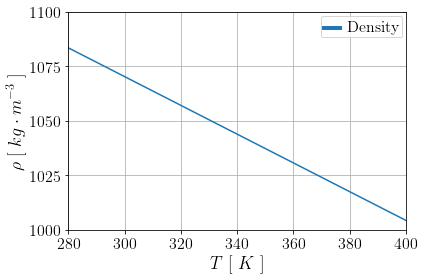

In [6]:
fig = plt.figure(4)
ax1=plt.subplot(111) 
plt.xlim(280,400)
plt.ylim(1000,1100)
plt.plot(T, rho_K(T), label="Density")

plt.grid(True)
plt.xlabel(r'$T\ [\ K\ ]$',fontsize=fontsize_legend+2)
plt.ylabel(r'$\rho \ [\ kg \cdot m^{-3}\ ]$',fontsize=fontsize_legend+2)

ax1.xaxis.set_ticks(np.arange(280,401,20))
ax1.yaxis.set_ticks(np.arange(1000,1101,25) )
leg = ax1.legend(loc='upper right',prop={'size': 8})
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=linesize_legend)
plt.setp(leg_texts, fontsize=fontsize_legend)

OutPutFig = '../doc/master_thesis/fig/rho.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)

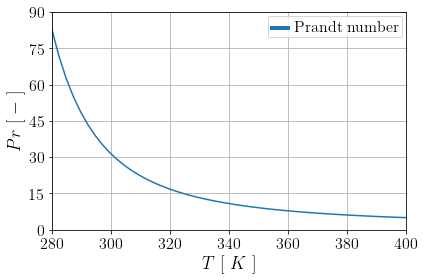

In [7]:
fig = plt.figure(5)
ax1=plt.subplot(111) 
plt.xlim(280,400)
#plt.ylim(1000,1100)

plt.plot(T, Pr_K(T), label="Prandt number")

plt.grid(True)
plt.xlabel(r'$T\ [\ K\ ]$',fontsize=fontsize_legend+2)
plt.ylabel(r'$Pr\ [\ -\ ]$',fontsize=fontsize_legend+2)

ax1.xaxis.set_ticks(np.arange(280,401,20))
ax1.yaxis.set_ticks(np.arange(0,91,15) )
leg = ax1.legend(loc='upper right',prop={'size': 8})
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
leg_lines = leg.get_lines()
leg_texts = leg.get_texts()

plt.setp(leg_lines, linewidth=linesize_legend)
plt.setp(leg_texts, fontsize=fontsize_legend)

OutPutFig = '../doc/master_thesis/fig/pr.pdf'
plt.tight_layout()
plt.savefig(OutPutFig)